<a href="https://colab.research.google.com/github/Corry-Grodek/DataScience/blob/main/CorrGrodU2proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Corry Grodek Unit 2 Project

#Mathematicaly Modeling Motorvehicle Markets  
**Using a pymc betabinomial model to calculate the likelihood of a vehicle selling on auction for above MSRP.**

I wanted to see how often used vehicles on an auction website sell above the manufacturer's original suggested price. I will be using the website Bring A Trailer, as they manage hundreds of auctions a week, providing a large data set. If a vehicle sells above its orginial MSRP that means it has increased in value, and vice versa.


**Definitions**
These are some terms I will be using often in this project

*   MSRP - The manufacturer's suggested retail price when the vehicle was new. This will be adjusted for inflation using the US Bureau of Labor Statistics inflation calculator. Values will also be converted to USD if necessary. https://data.bls.gov/cgi-bin/cpicalc.pl

*   Selling price - The price the vehicle is sold for at the end of a successful auction.

*  BaT - Bring a Trailer https://bringatrailer.com/

*  Vehicle - Most of BaT's auctions are cars, but there are also many trucks, motorbikes, and scooters, so I will use vehicles to generalize.


#Assumtions

I chose the topic of this project because I was curious about the subject. I don't intend to be able to derive information about the greater economy, so I will make some assumptions to simplify the study.

*   **Vehicles will gain or lose value over time** - As vehicles are used more they lose their re-sell value as components wear down and newer technology becomes available. Other vehicles will gain value over time as modifications are done or collector value increases.

*   **All vehicles have an equal chance to gain or lose value** - For simplicity, I will be using a random selection of vehicles, and will not account for the manufacturer, year or vehicle model. All of these factors usually affect depreciation, for example a higher quality car will lose less value.

*   **MSRP is representative of the value of the vehicle** - Generally this is true, though manufacturers can mark up or mark down a car for many reasons.

*   **The bidding process will be somewhat true to the value of the vehicle** - This is not always true, some bidders can bid way more than a car is worth for their own personal reasons that may not apply to other bidders.






In [2]:
#setup code

!pip install preliz
import preliz as pz #Visualizing beta distributions
import numpy  as np  #Working with numbers
import arviz  as az  #Show bayesian models
import pymc   as pm   #Build Bayesian models

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.6/505.6 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 13.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.7.post0 requires scipy!=1.12.0,>=0.13.2, but you have scipy 1.12.0 which is incompatible.


#Prior

For my prior I will use a set of cars that were on my "watchlist." These are 6 cars that caught my eye over the past few months. I watched the course of these auctions as they were happening, and I was familiar with the results. Of these 6 cars, 2 sold over their original MSRP.


I think this is fairly representative of how auctions on BaT will go. Almost all cars will depreciate (lose value) as soon as they are driven off the lot, however used car auctions (especially on BaT) can also include some special or notable vehicles. These vehicles tend to grow in value over time, either as collector items or through modifications, meaning a few cars may sell over their original MSRP.


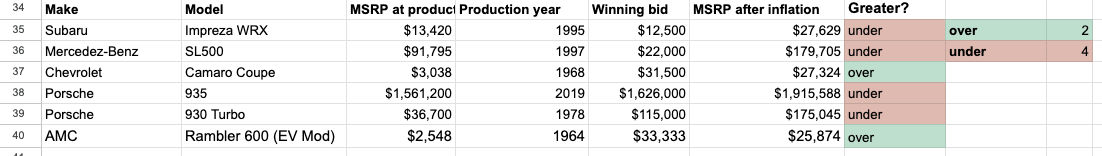

<Axes: >

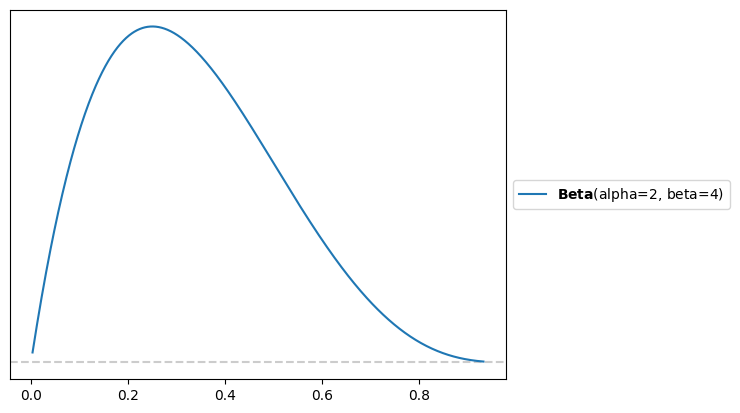

In [3]:
under = 4
over = 2

#Using a beta distribution to show the likelihood of a vehicle selling for above MSRP
pz.Beta(alpha=over,beta=under).plot_pdf()

#Collecting Data
I did this part in Google Sheets because I am more comfortable with it than Pandas dataframes. I have documented this processs here.



1.   First I randomly selected (scrolled a bunch and clicked) 30 vehicles that were auctioned in August of 2024, and put them in a spreadsheet, along with the year they were made and the selling price.


2.   I then found the original MSRP for the vehicles through Google. Most of the results were through the car valuation and research website Kelly Blue Book, with values of older vehicles coming from various other sources.


3.   Next I calculated the adjusted MSRP values due to inflation. I input the MSRP and production year into the USBLS Inflation Calculator mentioned earlier, and input those into the chart.


4.  I then used a function to determine whether or not the winning bid was above or below the adjusted MSRP, and another function to count the totals.

I had originally planned to automate the Adjusted MSRP calculations, but it was taking longer to implement than it would have taken been to do it manually.

#Final chart
Link to spreadsheet
https://docs.google.com/spreadsheets/d/1YHDxFg5Fh7l5GF0lM5uO2GmqAxqqY2M_-ZbwBjHtsRc/edit?usp=sharing

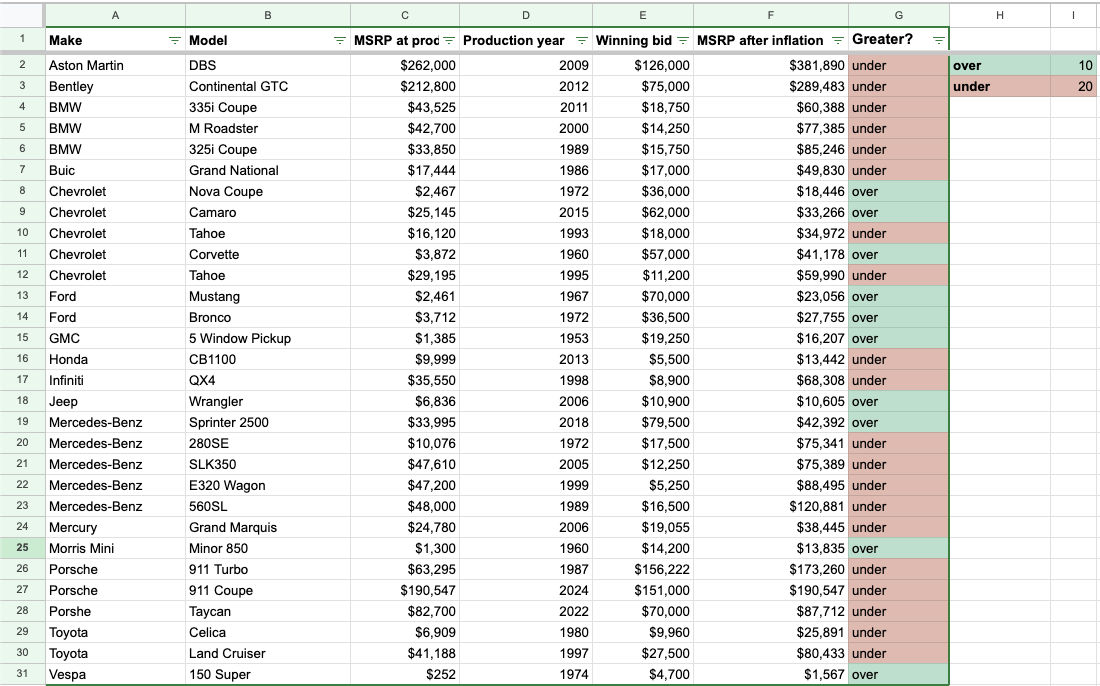

Based on this data, 20 cars sold under their adjusted MSRP, and 10 sold over.

<Axes: title={'center': 'θ'}>

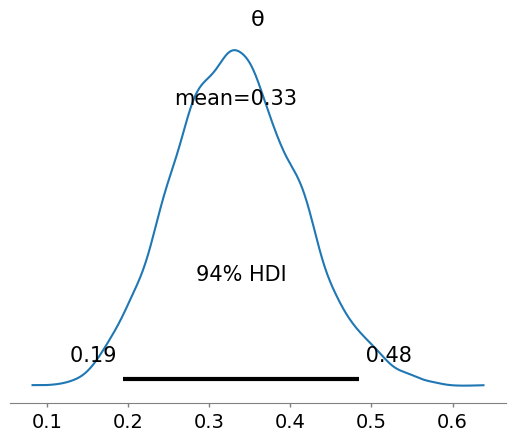

In [4]:
#Define number of samples (I choose 4286 because that was the number of cars sold on BaT in August, but a higher number would increase accuracy)
n = 4286

#Vehicles sold over MSRP
over_msrp = np.repeat(1, 10)

#Vehicles sold under MSRP
under_msrp = np.repeat(0, 20)

#Combine over and under into an array
overUnder = np.concatenate( [over_msrp, under_msrp] )

with pm.Model() as overUnder_model:

  #Defining our prior again
  θ = pm.Beta('θ' , alpha = 2. , beta = 4.)

  #Binomial distribution using our prior and our full data set
  y = pm.Bernoulli('y', p = θ, observed = overUnder)

  #Sample from posterior n times (higher n will increase accuracy)
  idata_FT = pm.sample(n)

#Visualize the distribution
az.plot_posterior(idata_FT)

Based on this model, there is an average .33 probability that a given car will sell over its original MSRP. This was lower than I initially expected, which I found interesting. This experiment could be more useful by using selling prices of new cars from dealerships, which would give more information on the state of the car market for normal car buyers.